## TAREA integración Montecarlo
1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

https://www.wolframalpha.com/

## Ejercicio 1

+ $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
+ $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [10]:
import numpy as np
import pandas as pd

In [6]:
def f1(x):
    return np.exp(x)*np.log(x)
def f2(x):
    return np.sin(x)*np.log(x)
    

In [13]:
def montecarlo1(f,a,b,N):
    u = (b-a)*np.random.rand(N) + a
    return (b-a)*np.mean(f(u))

In [9]:
a,b=1,3
N=(np.logspace(1,5,5)).astype(int)


In [15]:
tabla=pd.DataFrame(index=N, columns=("Aprox f1","Aprox f2"))
tabla.index.name = 'Cantidad de términos'

for n in N:
    tabla.loc[n,'Aprox f1'] = montecarlo1(f1,a,b,n)
    tabla.loc[n,'Aprox f2'] = montecarlo1(f2,a,b,n)
   

tabla

,Aprox f1,Aprox f2
Cantidad de términos,,
10,14.9269,0.758459
100,14.3477,0.899354
1000,13.2318,0.874263
10000,13.9527,0.867507
100000,13.9957,0.871239


## Ejercicio 2

$$x^2+2y^2\leq-2x+8y-7$$

In [19]:
import matplotlib.pyplot as plt

In [44]:
def region(x,y):
    return (x)**2 + 2*(y**2) <= - 2*x + 8*y - 7

In [88]:
n1 = 500
x = np.linspace(-np.sqrt(2)-1,.45,n1)
y = np.linspace(1,3,n1)

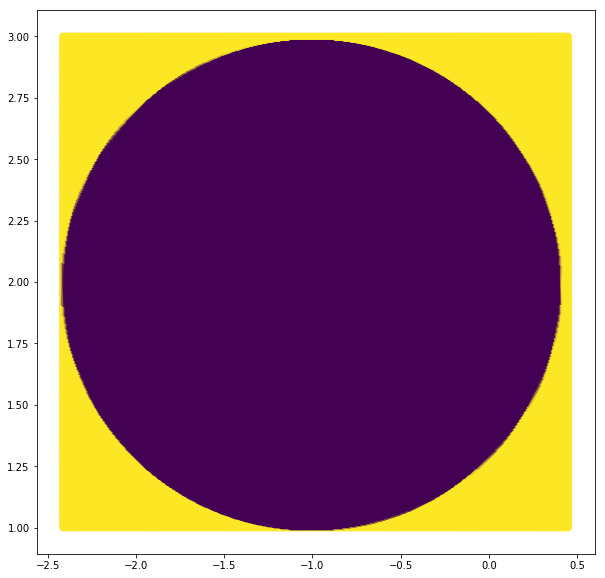

In [89]:
X,Y = np.meshgrid(x,y)

plt.figure(figsize=(10,10))
plt.scatter(X,Y,c=~region(X,Y),)
plt.show()

In [75]:
def montecarlo2(region,a1,b1,a2,b2,N):
    AR = (b1-a1)*(b2-a2)
    x = np.random.uniform(a1,b1,N)
    y = np.random.uniform(a2,b2,N)
    AD_approx = AR*np.mean(region(x,y))
    return AD_approx

In [100]:
ax,bx,ay,by=-np.sqrt(2)-1,.4,1,3
ad=3.77116
N1=(np.logspace(1,7,7)).astype(int)
tabla1 = pd.DataFrame(index=N1,columns=['Aproximación',"error aproximado"])

for n in N1:
    tabla1.loc[n,'Aproximación'] = montecarlo2(region,ax,bx,ay,by,n)
    tabla1.loc[n,"error aproximado"]=(montecarlo2(region,ax,bx,ay,by,n)-ad)

tabla1

,Aproximación,error aproximado
10,4.50274,0.731582
100,4.84045,0.956719
1000,4.54777,0.799123
10000,4.43013,0.648844
100000,4.44567,0.672202
1000000,4.44033,0.669528
10000000,4.44074,0.667781


In [101]:
ad

3.77116